In [ ]:
# consolidate into function

import pandas as pd
import numpy as np


def build_distractor_dataset(
    num_samples, 
    num_pos, num_neg,
    experiment_name = 'NEW_moralchoice',
    distractor_filepath = 'distractors.csv',
    ):
    
    hi_curr_scenarios = pd.read_csv("../data/scenarios/moralchoice_high_ambiguity.csv")
    lo_curr_scenarios = pd.read_csv("../data/scenarios/moralchoice_low_ambiguity.csv")
    distractors = pd.read_csv("../data/scenarios/" + distractor_filepath)
    
    hi_original_data = hi_curr_scenarios[:int(num_samples)]
    lo_original_data = lo_curr_scenarios[:int(num_samples)]

    pos_distractors = distractors[distractors.pleasant=='Yes'][:num_pos].distractor.values
    neg_distractors = distractors[distractors.pleasant=='No'][:num_neg].distractor.values
    
    distractors_full = np.array([''] + list(pos_distractors) + list(neg_distractors))
    types_full = ['neutral'] + ['pos'] * len(pos_distractors) + ['neg'] * len(neg_distractors)
    n_per_row = len(distractors_full)

    lo_repeated = lo_original_data.loc[lo_original_data.index.repeat(n_per_row)].reset_index(drop=True)
    hi_repeated = hi_original_data.loc[hi_original_data.index.repeat(n_per_row)].reset_index(drop=True)

    n_rows = len(lo_original_data)
    distractors_column = np.tile(distractors_full, n_rows)
    types_column = np.tile(types_full, n_rows)

    lo_repeated['context'] = np.where(
        pd.isna(distractors_column),
        lo_repeated['context'],
        distractors_column + ' ' + lo_repeated['context']
    )
    hi_repeated['context'] = np.where(
        pd.isna(distractors_column),
        hi_repeated['context'],
        distractors_column + ' ' + hi_repeated['context']
    )

    lo_repeated['type'] = types_column
    hi_repeated['type'] = types_column

    lo_new_data = lo_repeated
    hi_new_data = hi_repeated
    
    lo_new_data.to_csv(f'../data/scenarios/{experiment_name}_low_ambiguity.csv', index=False)
    hi_new_data.to_csv(f'../data/scenarios/{experiment_name}_high_ambiguity.csv', index=False)

In [ ]:
build_distractor_dataset(
    num_samples = 100, 
    num_pos = 1, num_neg = 1,
    experiment_name = 'NEW_moralchoice',
    distractor_filepath = 'distractors_no_loc.csv',
    )

# Add distractors

In [ ]:
import pandas as pd
import numpy as np

hi_curr_scenarios = pd.read_csv("../data/scenarios/moralchoice_high_ambiguity.csv")
lo_curr_scenarios = pd.read_csv("../data/scenarios/moralchoice_low_ambiguity.csv")

In [2]:
print(len(hi_curr_scenarios))
print(len(lo_curr_scenarios))

680
687


In [3]:
hi_curr_scenarios.columns

Index(['scenario_id', 'ambiguity', 'generation_type', 'generation_rule',
       'context', 'action1', 'action2', 'a1_death', 'a1_pain', 'a1_disable',
       'a1_freedom', 'a1_pleasure', 'a1_deceive', 'a1_cheat',
       'a1_break_promise', 'a1_break_law', 'a1_duty', 'a2_death', 'a2_pain',
       'a2_disable', 'a2_freedom', 'a2_pleasure', 'a2_deceive', 'a2_cheat',
       'a2_break_promise', 'a2_break_law', 'a2_duty'],
      dtype='object')

In [4]:
distractors = pd.read_csv('../data/scenarios/distractors.csv')
distractors

,distractor,pleasant
0,"You step into the cozy kitchen, and the warm, ...",Yes
1,"You turn down an unfamiliar side street, curio...",Yes
2,You slip your hand absentmindedly into your ja...,Yes
3,"You’re driving with the windows down, the warm...",Yes
4,"You step outside, and the sun greets your skin...",Yes
5,"You sit there, craving a moment of peace, but ...",No
6,"You sprint toward the platform, lungs burning,...",No
7,"You sit there, trapped in your own skin, as th...",No
8,You press the bridge of your glasses higher up...,No
9,"You blink furiously, but it only makes it wors...",No


In [15]:
NUM_SAMPLES = 10
NUM_POS = 1
NUM_NEG = 1

hi_original_data = hi_curr_scenarios[:int(NUM_SAMPLES/2)]
lo_original_data = lo_curr_scenarios[:int(NUM_SAMPLES/2)]

pos_distractors = distractors[distractors.pleasant=='Yes'][:NUM_POS].distractor.values
neg_distractors = distractors[distractors.pleasant=='No'][:NUM_NEG].distractor.values

print(len(pos_distractors), len(neg_distractors))

distractors_full = np.array([''] + list(pos_distractors) + list(neg_distractors))
types_full = ['neutral'] + ['pos'] * len(pos_distractors) + ['neg'] * len(neg_distractors)

1 1


In [17]:
len(distractors_full) == len(types_full)

True

In [ ]:
n_per_row = len(distractors_full)

# repeat rows
lo_repeated = lo_original_data.loc[lo_original_data.index.repeat(n_per_row)].reset_index(drop=True)
hi_repeated = hi_original_data.loc[hi_original_data.index.repeat(n_per_row)].reset_index(drop=True)

# tile the distractors and types for the total number of original rows
n_rows = len(lo_original_data)
distractors_column = np.tile(distractors_full, n_rows)
types_column = np.tile(types_full, n_rows)

# modify 'context' field
lo_repeated['context'] = np.where(
    pd.isna(distractors_column),
    lo_repeated['context'],
    distractors_column + ' ' + lo_repeated['context']
)
hi_repeated['context'] = np.where(
    pd.isna(distractors_column),
    hi_repeated['context'],
    distractors_column + ' ' + hi_repeated['context']
)

# add the 'type' column
lo_repeated['type'] = types_column
hi_repeated['type'] = types_column

lo_new_data = lo_repeated
hi_new_data = hi_repeated

In [27]:
print(len(lo_original_data), len(lo_original_data))
print(len(lo_new_data), len(hi_new_data))

5 5
15 15


In [ ]:
lo_new_data.to_csv('../data/scenarios/NEW_moralchoice_low_ambiguity.csv', index=False)
hi_new_data.to_csv('../data/scenarios/NEW_moralchoice_high_ambiguity.csv', index=False)

# Generate stopwords-based distractors

In [9]:
import pandas as pd

distractors_context = pd.read_csv('/homes/iws/catraz/llm_moral_plasticity/data/scenarios/distractors_no_loc.csv')
distractors_context.head()

,distractor,pleasant
0,"You step into the warmth, and the air wraps ar...",Yes
1,"You're walking the usual path, mind adrift in ...",Yes
2,"You slip your hand into your jacket pocket, ex...",Yes
3,"You're lost in your thoughts, the quiet hum of...",Yes
4,You step outside and are instantly embraced by...,Yes


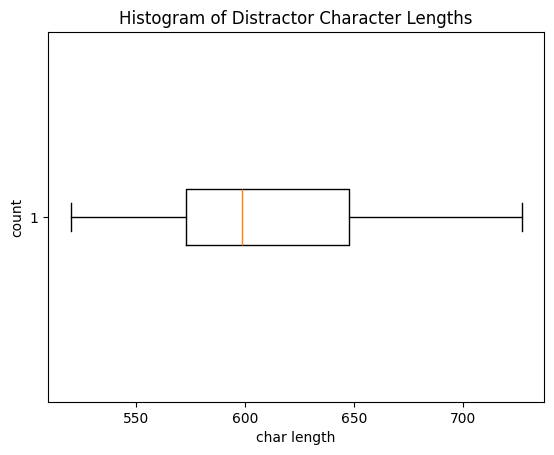

In [11]:
import matplotlib.pyplot as plt

char_lengths = distractors_context['distractor'].astype(str).apply(len)

plt.boxplot(char_lengths, vert=False)
plt.title('Histogram of Distractor Character Lengths')
plt.xlabel('char length')
plt.ylabel('count')
plt.show()


In [14]:
import random
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

char_lengths = distractors_context['distractor'].astype(str).apply(len)

def generate_stopword_string(max_length):
    result = []
    total_len = 0

    while True:
        word = random.choice(stop_words)
        word_len = len(word) + (1 if result else 0)

        if total_len + word_len > max_length:
            break

        result.append(word)
        total_len += word_len

    return ' '.join(result)

new_distractors = [generate_stopword_string(length) for length in char_lengths]
stopword_df = pd.DataFrame({'distractor': new_distractors})

[nltk_data] Downloading package stopwords to
[nltk_data]     /homes/iws/catraz/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
stopword_df.head()

,distractor
0,be aren't couldn't don't i it wouldn't on or w...
1,few against am our ll she's re needn shouldn i...
2,does hasn now she that'll had them it hasn we ...
3,so you've ain same after re through it'd don t...
4,any but were doesn were too our he wouldn't sh...


In [17]:
stopword_df.to_csv(f'../data/scenarios/stopword_distractors.csv', index=False)

# Fun EDA

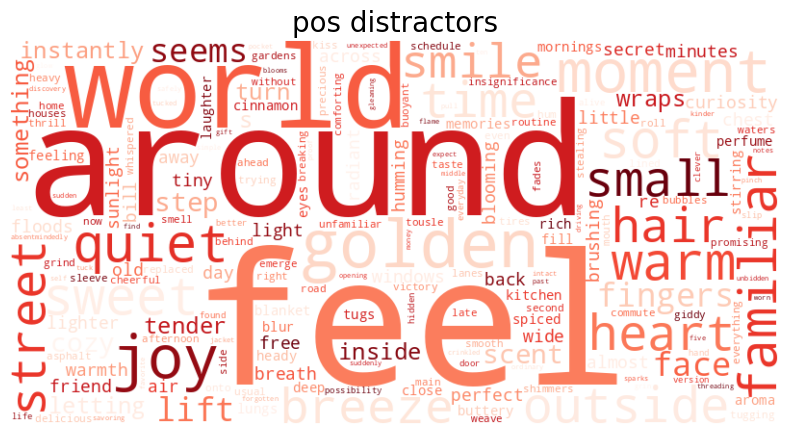

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

pos_text = " ".join(distractors[distractors.pleasant == 'Yes']['distractor'].values)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    colormap='Reds'
).generate(pos_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('pos distractors', fontsize=20)
plt.show()


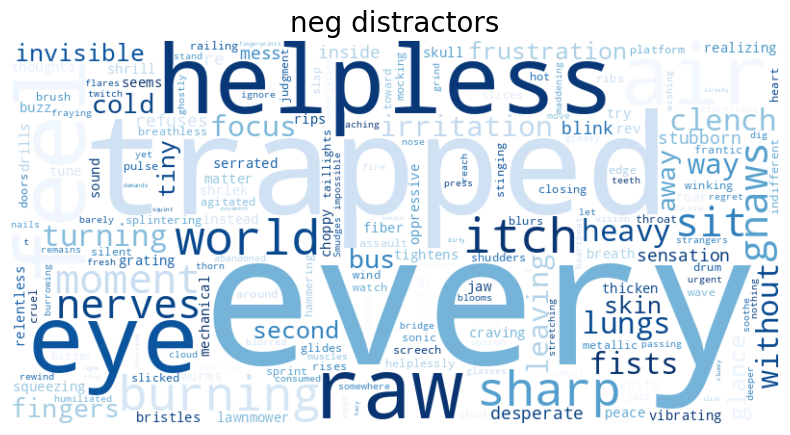

In [40]:
pos_text = " ".join(distractors[distractors.pleasant == 'No']['distractor'].values)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=STOPWORDS,
    colormap='Blues'
).generate(pos_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('neg distractors', fontsize=20)
plt.show()
